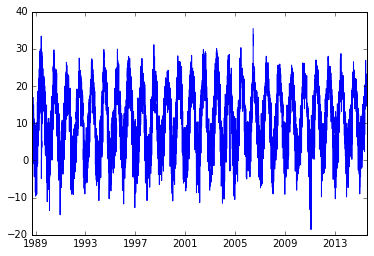

In [76]:
plt.plot(quez.index,quez.Tmax)

In [62]:
vcm = pd.read_pickle('./data/Vcm_cosmos_pillow_swe.pcl')/100.
quez = pd.read_pickle('./data/quemazon_snotel.pcl')
vacas = pd.read_pickle('./data/vacas_local_snotel.pcl')
sen = pd.read_pickle('./data/senorita_divide_2_snotel.pcl')

In [75]:
# rudimentary QA/QC
quez.loc[quez.Tave>20,'Tave'] = np.NaN
quez.loc[quez.Tave<-20,'Tave'] = np.NaN
quez.loc[quez.Tmin<-25,'Tmin'] = np.NaN
quez.loc[quez.Tmin>20,'Tmin'] = np.NaN
quez.loc[quez.Tmax>38,'Tmax'] = np.NaN
quez.loc[quez.Tmax<-20,'Tmax'] = np.NaN

sen.loc[sen.Tave<-20,'Tave'] = np.NaN
sen.loc[sen.Tmax<-16,'Tmax'] = np.NaN
sen.loc[sen.Tmin>20,'Tmin'] = np.NaN
sen.loc[sen.Tmin<-32,'Tmin'] = np.NaN

In [24]:
quez.head()

,Tave,Tmax,Tmin,accumP,P,Psnowadj,SD,SWE,WS,WD,maxWS,Srad,sm_2in,sm_8in,sm_20in,st_2in,st_8in,st_20in,snowmelt
1980-06-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1980-06-04,NaN,NaN,NaN,528,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1980-06-05,NaN,NaN,NaN,528,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1980-06-06,NaN,NaN,NaN,528,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1980-06-07,NaN,NaN,NaN,528,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


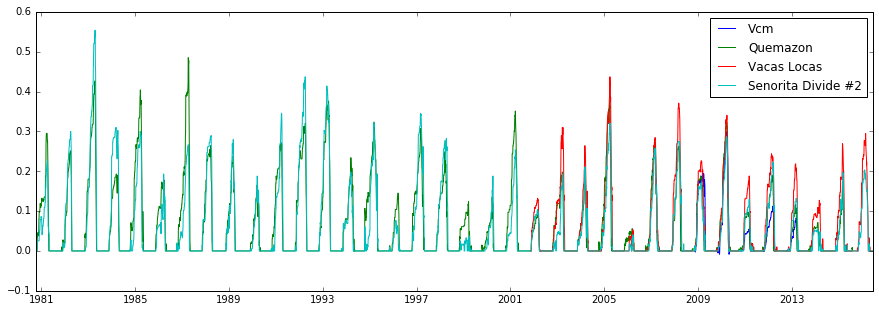

In [2]:
plt.figure(figsize=(15,5))
plt.plot(vcm,label='Vcm')
plt.plot(quez,label='Quemazon')
plt.plot(vacas,label='Vacas Locas')
plt.plot(sen,label='Senorita Divide #2')
plt.legend(loc='upper right')

In [3]:
datmin = vcm.index.min()
datmax = vcm.index.max()

In [51]:
# use the quemazon and senorita divide to approximate Vcm
dat = pd.DataFrame({'vcm_swe':vcm.swe.as_matrix(),'quez_swe':quez[datmin:datmax].SWE.as_matrix(),'sen_swe':sen[datmin:datmax].SWE.as_matrix(),
                   'quez_Tave':quez[datmin:datmax].Tave.as_matrix(),'sen_Tave':sen[datmin:datmax].Tave.as_matrix(),
                   'quez_Tmax':quez[datmin:datmax].Tmax.as_matrix(),'sen_Tmax':sen[datmin:datmax].Tmax.as_matrix(),
                   'quez_Tmin':quez[datmin:datmax].Tmin.as_matrix(),'sen_Tmin':sen[datmin:datmax].Tmin.as_matrix()})
dat.dropna(inplace=True)

In [37]:
import statsmodels.formula.api as sm

In [77]:
mod = sm.ols('vcm_swe ~ quez_swe + sen_swe - 1',dat).fit()

In [78]:
print mod.summary()

                            OLS Regression Results                            
Dep. Variable:                vcm_swe   R-squared:                       0.879
Model:                            OLS   Adj. R-squared:                  0.879
Method:                 Least Squares   F-statistic:                     3216.
Date:                Mon, 20 Jun 2016   Prob (F-statistic):               0.00
Time:                        11:19:18   Log-Likelihood:                 1674.5
No. Observations:                 887   AIC:                            -3345.
Df Residuals:                     885   BIC:                            -3336.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
quez_swe       0.0006   3.58e-05     17.786      0.0

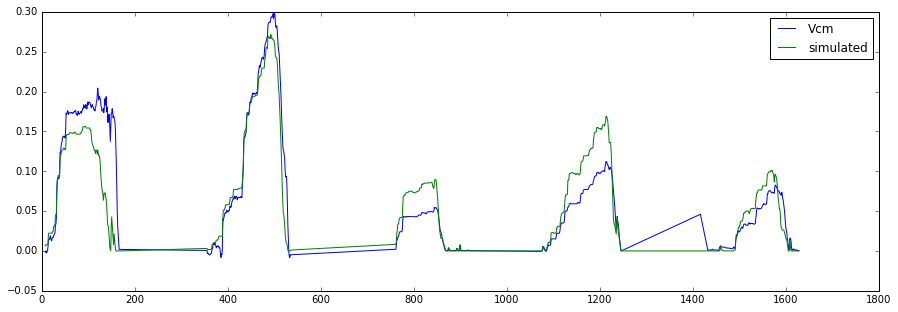

In [79]:
plt.figure(figsize=(15,5))
plt.plot(dat.index,dat.vcm_swe,label='Vcm')
plt.plot(dat.index,mod.fittedvalues,label='simulated')
plt.legend(loc='upper right')

In [80]:
mod2 = sm.ols('vcm_swe ~ quez_swe + sen_swe + quez_Tave + sen_Tave - 1',dat).fit()
print mod2.summary()

                            OLS Regression Results                            
Dep. Variable:                vcm_swe   R-squared:                       0.889
Model:                            OLS   Adj. R-squared:                  0.889
Method:                 Least Squares   F-statistic:                     1774.
Date:                Mon, 20 Jun 2016   Prob (F-statistic):               0.00
Time:                        11:19:30   Log-Likelihood:                 1713.9
No. Observations:                 887   AIC:                            -3420.
Df Residuals:                     883   BIC:                            -3401.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
quez_swe       0.0007   3.56e-05     19.945      0.0

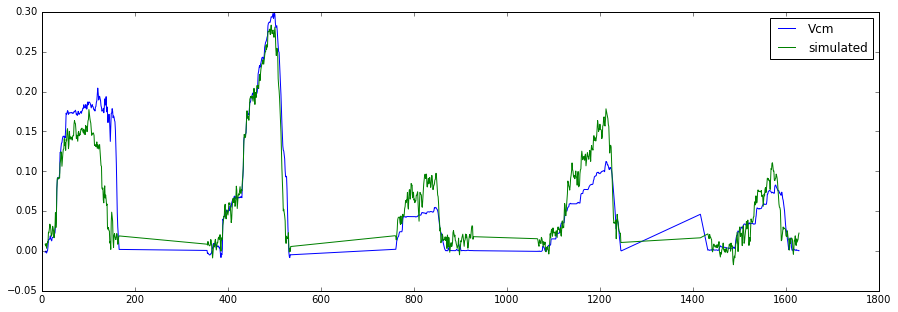

In [81]:
plt.figure(figsize=(15,5))
plt.plot(dat.index,dat.vcm_swe,label='Vcm')
plt.plot(dat.index,mod2.fittedvalues,label='simulated')
plt.legend(loc='upper right')

In [89]:
mod3 = sm.ols('vcm_swe ~ quez_swe + sen_swe + quez_Tave + sen_Tave + sen_swe*sen_Tave + quez_swe*quez_Tave -1 ',dat).fit()
print mod3.summary()

                            OLS Regression Results                            
Dep. Variable:                vcm_swe   R-squared:                       0.891
Model:                            OLS   Adj. R-squared:                  0.890
Method:                 Least Squares   F-statistic:                     1199.
Date:                Mon, 20 Jun 2016   Prob (F-statistic):               0.00
Time:                        11:35:45   Log-Likelihood:                 1720.2
No. Observations:                 887   AIC:                            -3428.
Df Residuals:                     881   BIC:                            -3400.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------------
quez_swe               0.0008   3.75

In [92]:
mod3a = sm.ols('vcm_swe ~ quez_swe + sen_swe + sen_swe:sen_Tave + quez_swe:quez_Tave -1 ',dat).fit()
print mod3a.summary()

                            OLS Regression Results                            
Dep. Variable:                vcm_swe   R-squared:                       0.889
Model:                            OLS   Adj. R-squared:                  0.888
Method:                 Least Squares   F-statistic:                     1766.
Date:                Mon, 20 Jun 2016   Prob (F-statistic):               0.00
Time:                        11:37:20   Log-Likelihood:                 1712.3
No. Observations:                 887   AIC:                            -3417.
Df Residuals:                     883   BIC:                            -3397.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------------
quez_swe               0.0008   3.71

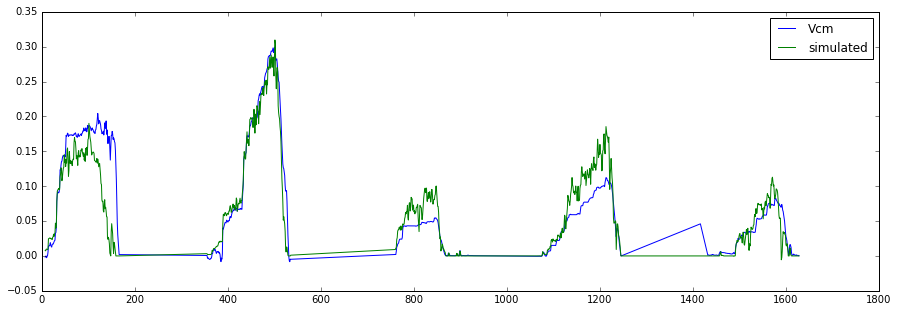

In [93]:
plt.figure(figsize=(15,5))
plt.plot(dat.index,dat.vcm_swe,label='Vcm')
plt.plot(dat.index,mod3a.fittedvalues,label='simulated')
plt.legend(loc='upper right')

In [88]:
mod4 = sm.ols('vcm_swe ~ quez_swe*quez_Tave + quez_swe*quez_Tmin + quez_swe*quez_Tmax + sen_swe*sen_Tave + sen_swe*sen_Tmin + sen_swe*sen_Tmax - 1 ',dat).fit()
print mod4.summary()

                            OLS Regression Results                            
Dep. Variable:                vcm_swe   R-squared:                       0.896
Model:                            OLS   Adj. R-squared:                  0.894
Method:                 Least Squares   F-statistic:                     535.3
Date:                Mon, 20 Jun 2016   Prob (F-statistic):               0.00
Time:                        11:35:02   Log-Likelihood:                 1740.1
No. Observations:                 887   AIC:                            -3452.
Df Residuals:                     873   BIC:                            -3385.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------------
quez_swe               0.0007   8.36

In [86]:
mod5 = sm.ols('vcm_swe ~ quez_swe:quez_Tmin + quez_swe:quez_Tmax + sen_swe:sen_Tmin + sen_swe:sen_Tmax - 1 ',dat).fit()
print mod3.summary()

                            OLS Regression Results                            
Dep. Variable:                vcm_swe   R-squared:                       0.891
Model:                            OLS   Adj. R-squared:                  0.890
Method:                 Least Squares   F-statistic:                     1200.
Date:                Mon, 20 Jun 2016   Prob (F-statistic):               0.00
Time:                        11:34:23   Log-Likelihood:                 1722.6
No. Observations:                 888   AIC:                            -3433.
Df Residuals:                     882   BIC:                            -3404.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------------
quez_swe               0.0008   3.74

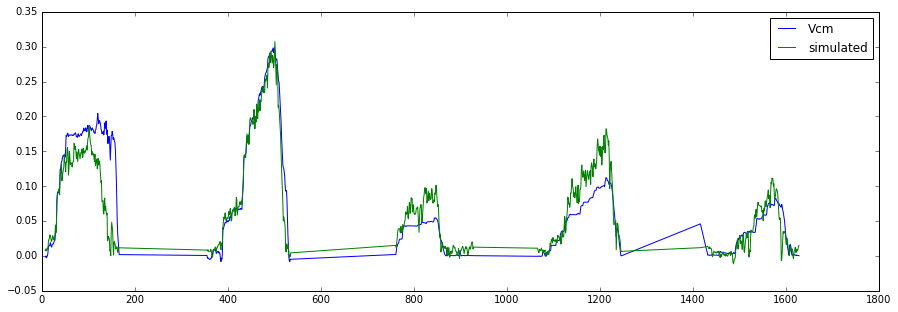

In [83]:
plt.figure(figsize=(15,5))
plt.plot(dat.index,dat.vcm_swe,label='Vcm')
plt.plot(dat.index,mod4.fittedvalues,label='simulated')
plt.legend(loc='upper right')

In [13]:
mod4 = sm.ols('vcm ~ quez*sen + 1',dat).fit()
print mod4.summary()

                            OLS Regression Results                            
Dep. Variable:                    vcm   R-squared:                       0.775
Model:                            OLS   Adj. R-squared:                  0.774
Method:                 Least Squares   F-statistic:                     1026.
Date:                Wed, 15 Jun 2016   Prob (F-statistic):          9.42e-289
Time:                        15:44:17   Log-Likelihood:                 1713.7
No. Observations:                 897   AIC:                            -3419.
Df Residuals:                     893   BIC:                            -3400.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      0.0086      0.002      4.055      0.0

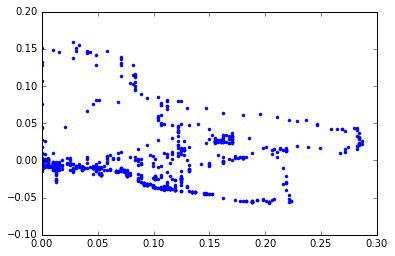

In [18]:
# try two, add more data...
dat = pd.DataFrame({'vcm_swe':vcm.swe.as_matrix(),'quez_swe':quez[datmin:datmax].as_matrix(),
                    'sen_swe':sen[datmin:datmax].as_matrix(),'quez_tave':quez[datmin:datmax].tave.as_matrix(),
                   'sen_tave':sen[datmin:datmax].tave.as_matrix()})
dat.dropna(inplace=True)